In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Загрузить данные из папки Data Folder

In [6]:
data = pd.read_csv('data/flag.data', header=None, names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])

### 2. Провести описательный анализ предложенных данных

In [8]:
pd.options.display.max_columns = None
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [10]:
data['mainhue'].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [11]:
data['topleft'].value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64

In [12]:
data['botright'].value_counts()

red       69
blue      47
green     40
white     17
gold       9
black      9
brown      2
orange     1
Name: botright, dtype: int64

#### religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

In [13]:
data['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

#### Данные содержат информацию о параметрах страны: несколько описаний географического расположения, язык. Также содержится информация о параметрах флага: количество цветов, наличие определенного цвета, наличие определенных элементов - круги, квадраты, линии и т.д.  Данные очень аккуратные и не содержат пропусков. Категориальные данные содержат одни и те же значения - цвета.

### 3. Предложить стратегию по работе с категориальными переменными

#### Т.к задача классификации более чем на 2 класса, буду использовать классификатор RandomForestClassifier для построения модели. Категориальные значения закодирую с использованием StandardScaler.

### 4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

#### Название страны уникально и поэтому не влияет на религию. В анализе учитывать не будем.

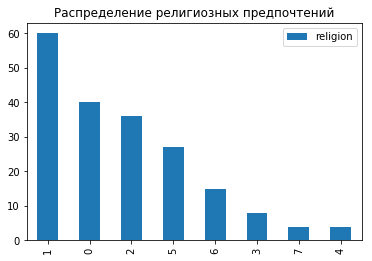

In [34]:
data['religion'].value_counts().plot(kind='bar', label='religion')
plt.legend()
plt.title('Распределение религиозных предпочтений');

#### Посмотрим на взимосвязь географических признаков.

#### Разделим все признаки по их значению.

In [77]:
country = ['landmass', 'zone', 'area', 'population', 'language']
colors = ['colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
colors_countable = ['colours']
colors_existence = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
colors_categorical = ['mainhue', 'topleft', 'botright']
shape = ['bars', 'stripes', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text']
shape_countable = ['bars', 'stripes', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars']
shape_existence = ['crescent', 'triangle', 'icon', 'animate', 'text']

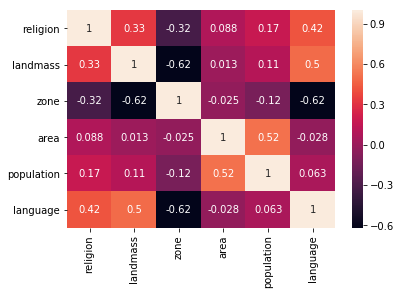

In [88]:
corr_matrix = data[['religion'] + country].corr()
sns.heatmap(corr_matrix, annot=True)

#### Есть ожидаемая взаимосвязь между landmass (часть света) и zone (квадрат относительно гринвича и экватора). Есть сильная взаимосвязь между zone и language. Также есть взаимосвязь между area и population, но не такая сильная. Есть взимосвязь между zone, language и religion.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


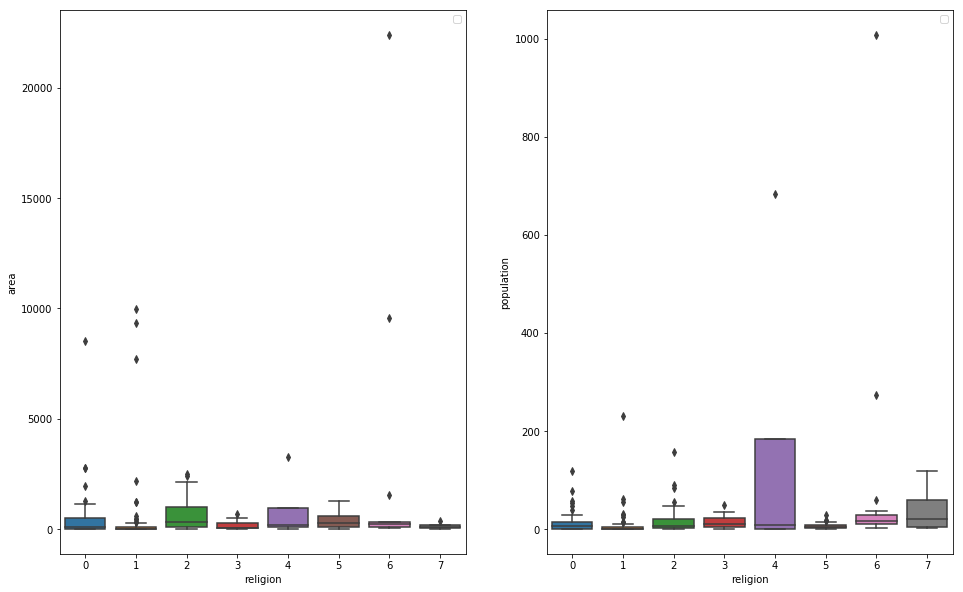

In [62]:
features = ['area', 'population']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.boxplot(x='religion', y=feat, data=data, ax=axes[idx])
    axes[idx].legend()
    axes[idx].set_xlabel('religion')
    axes[idx].set_ylabel(feat);

#### Можно наблюдать значительные отличия для population.

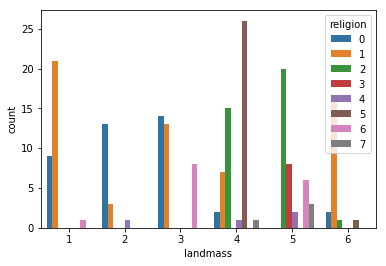

In [63]:
sns.countplot(x='landmass', hue='religion', data=data);

#### Ожидаемо религии сгруппированы географически, поэтому признак landmass может быть очень полезен.

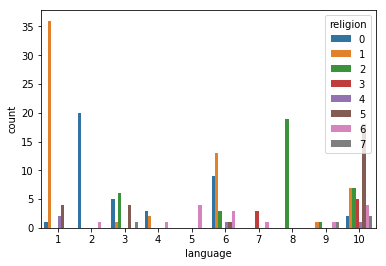

In [68]:
sns.countplot(x='language', hue='religion', data=data);

#### Также есть ожидаемая связь между религией и языком.

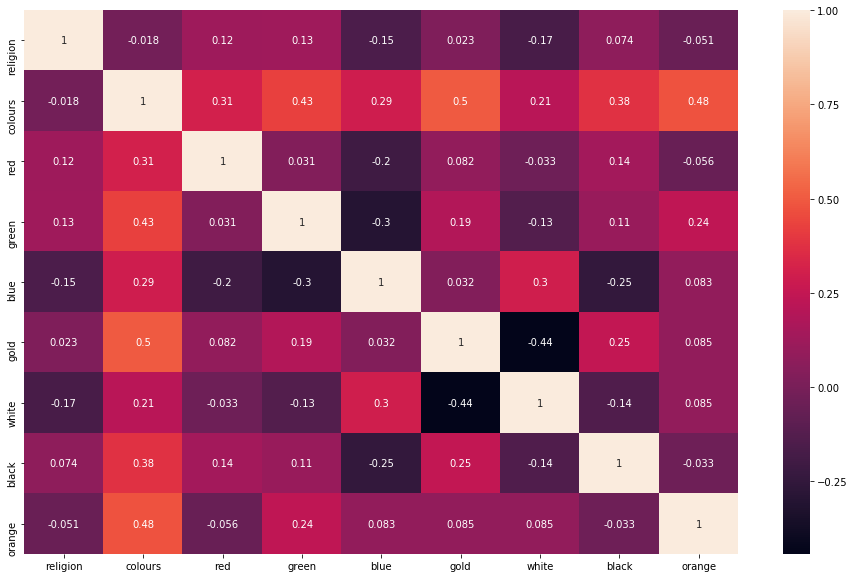

In [89]:
corr_matrix = data[['religion'] + colors + colors_categorical].corr()
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, ax=ax)

#### Есть ожидаемые взаимосвязи между цветами, но сильно связи между определенным цветом и религией не видно, можно выделить только голубой, белый, красный и зеленый.

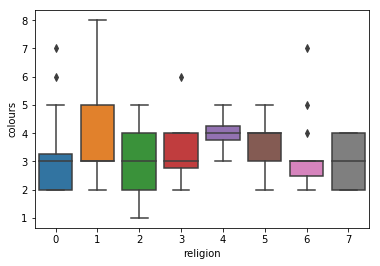

In [71]:
sns.boxplot(x='religion', y='colours', data=data)

#### Можно заметить определенные предпочтения по колличеству цветов в зависимости от религии.

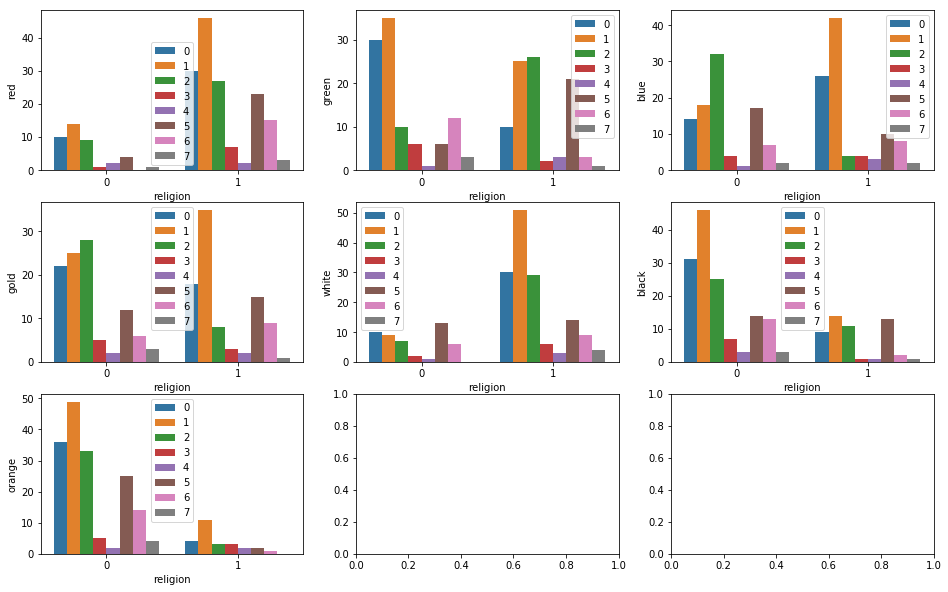

In [75]:
features = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.countplot(x=feat, hue='religion', data=data, ax=axes[idx // 3, idx % 3]);
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel('religion')
    axes[idx // 3, idx % 3].set_ylabel(feat);

#### Можно выделить определенные цветовые прдпочтения для религий. Но не очень явные.

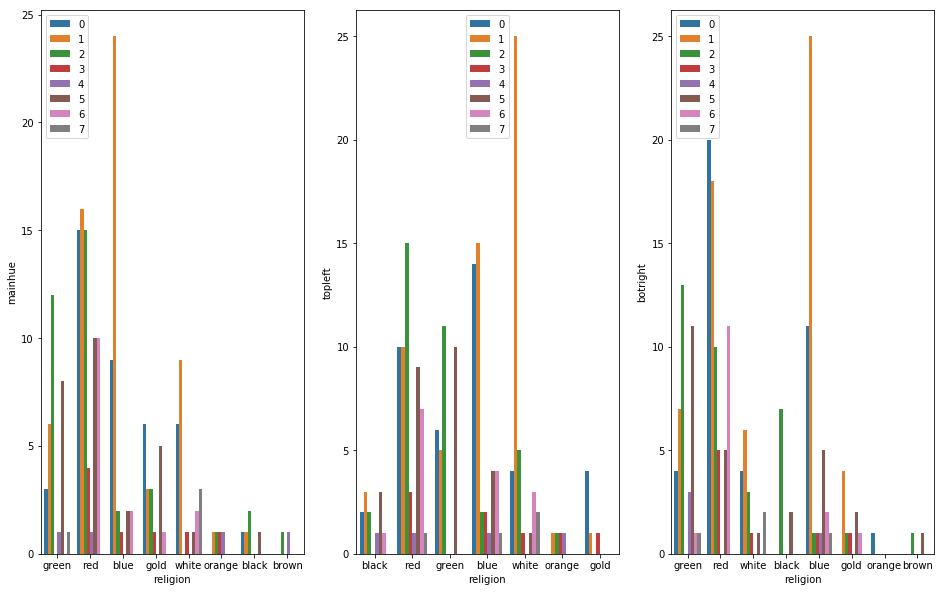

In [83]:
features = colors_categorical
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.countplot(x=feat, hue='religion', data=data, ax=axes[idx]);
    axes[idx].legend()
    axes[idx].set_xlabel('religion')
    axes[idx].set_ylabel(feat);

#### В категориальных цветах есть определенные зависимости с религией.

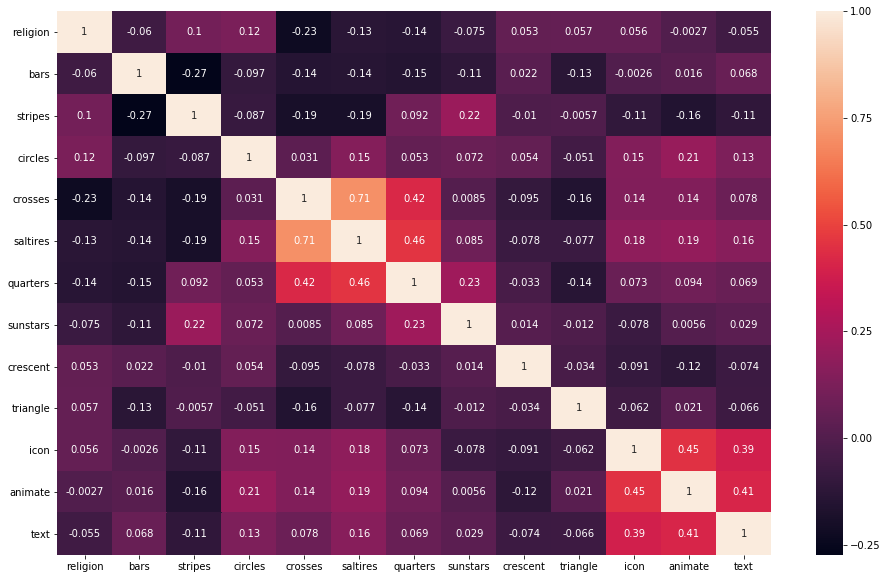

In [90]:
corr_matrix = data[['religion'] + shape].corr()
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, ax=ax)

#### Узоры на флаге более сильно взаимосвязаны между собой, но по большей части не сильно коррелированы с религией. Можно выдлеить только: stripes, circles, crosses, saltires, quarters.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


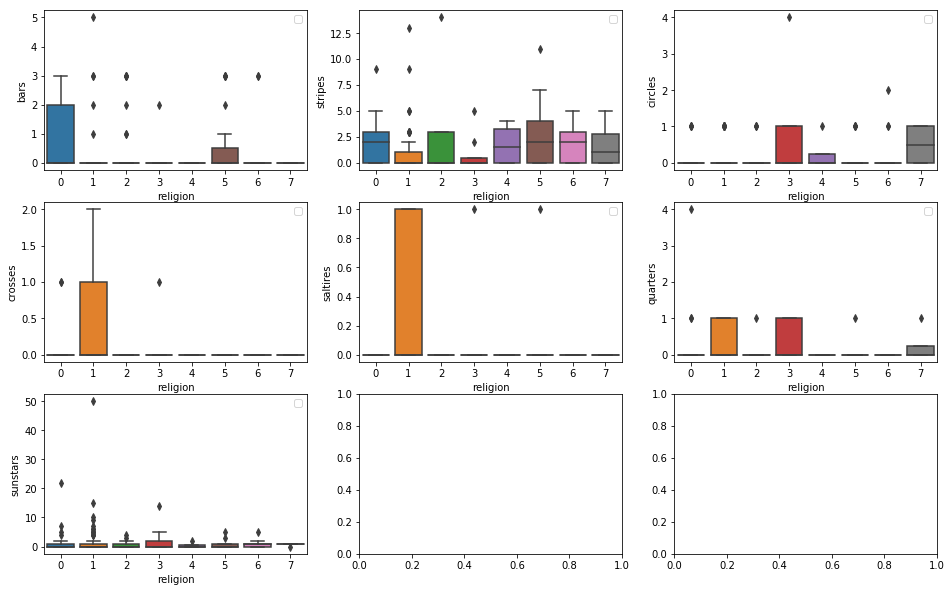

In [78]:
features = shape_countable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.boxplot(x='religion', y=feat, data=data, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel('religion')
    axes[idx // 3, idx % 3].set_ylabel(feat);

#### По колличеству элементов сильно выделяются bars, circles, crosses, saltires и quarters

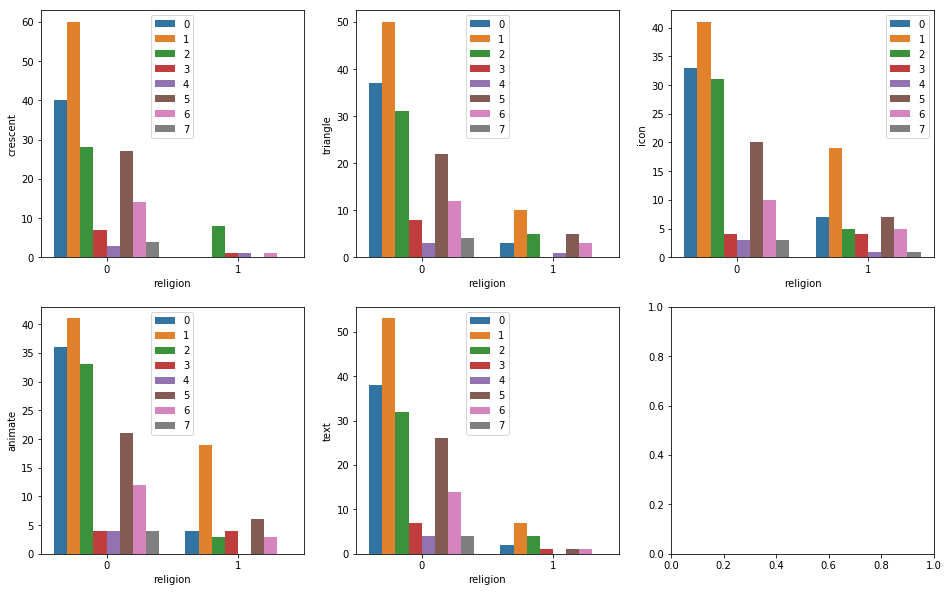

In [79]:
features = shape_existence
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.countplot(x=feat, hue='religion', data=data, ax=axes[idx // 3, idx % 3]);
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel('religion')
    axes[idx // 3, idx % 3].set_ylabel(feat);

#### Визуально отсутствие того или иного признака распределено одинаково между религиями, но наличие всех кроме text могут подсказать религию.

#### Резюмирую: взаимосвязь с религией - zone, language, white, blue, green, red, quarters, saltires, crosses, circles, stripes. Данные между собой коррелированы, особенно элементы на флаге.

### 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

#### Размерность данных определенно нужно уменьшать, т.к. наблюдается сильная корреляция между определенными признаками. Существует сильный риск переобучения модели.

### 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

#### Затрудняюсь дать ответ на этот вопрос. Прочитав только определения этих подходов, могу предположить что проводить эти операции не нужно, т.к. данных достаточно (может даже и избыточно) и нет одного очень сильного признака.

### 7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [140]:
from sklearn.model_selection import train_test_split
features = ['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
X_train, X_validation, y_train, y_validation = train_test_split( data[features], data['religion'], test_size = 0.3, random_state = 0 )

In [141]:
color_values = list(set(X_train['mainhue'].unique()) | set(X_train['topleft'].unique()) | set(X_train['botright'].unique()))

In [142]:
color_values

['black', 'red', 'blue', 'orange', 'brown', 'gold', 'green', 'white']

In [143]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(color_values)

LabelEncoder()

In [144]:
X_train['mainhue'] = encoder.transform(X_train['mainhue'])
X_train['topleft'] = encoder.transform(X_train['topleft'])
X_train['botright'] = encoder.transform(X_train['botright'])

In [145]:
X_train.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
86,5,1,21,4,10,0,2,2,0,0,1,0,1,0,0,7,0,0,0,0,1,0,0,0,0,0,1,1
54,4,1,1222,31,10,0,3,3,1,1,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,6
158,4,3,0,0,1,0,0,7,1,1,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,7,1
16,3,1,31,10,6,3,0,3,1,0,0,1,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,6
51,4,1,1001,47,8,0,3,4,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,6,0


In [146]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=5, max_features=0.5, n_jobs=-1)

In [147]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
search = GridSearchCV(classifier, param_grid, cv=3)
search.fit(X_train, y_train)

/home/myxrome/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага

In [149]:
X_validation['mainhue'] = encoder.transform(X_validation['mainhue'])
X_validation['topleft'] = encoder.transform(X_validation['topleft'])
X_validation['botright'] = encoder.transform(X_validation['botright'])

In [150]:
search.best_estimator_.score(X_validation, y_validation)

0.6271186440677966

### 9. Рассчитать Feature Importances для переменных модели

In [151]:
search.best_estimator_.feature_importances_

array([0.26430531, 0.09369455, 0.10672019, 0.00775564, 0.19893622,
       0.0116665 , 0.02839485, 0.0125823 , 0.00684388, 0.00495151,
       0.05322112, 0.0074181 , 0.01333478, 0.01846201, 0.        ,
       0.00502371, 0.01633995, 0.05616049, 0.        , 0.01733927,
       0.01349392, 0.        , 0.        , 0.        , 0.03733492,
       0.        , 0.01372464, 0.01229613])

In [156]:
important_features = [feature for feature, importance in zip(X_train.columns, search.best_estimator_.feature_importances_) if importance > 0.01]

In [157]:
important_features

['landmass',
 'zone',
 'area',
 'language',
 'bars',
 'stripes',
 'colours',
 'blue',
 'white',
 'black',
 'circles',
 'crosses',
 'quarters',
 'sunstars',
 'animate',
 'topleft',
 'botright']

#### На анализе я выделил: zone, language, white, blue, green, red, quarters, saltires, crosses, circles, stripes